In [18]:
path = '/home/hv2237/GYAFC_Corpus/Family_Relationships'
data = {}
for split in ['train']:
    data[split] = []
    for f, i in zip(open(f'{path}/{split}/formal').readlines(),open(f'{path}/{split}/informal').readlines()):
        data[split].append({'formal':f[:-1], 'informal':i[:-1]})
        
for split in ['tune', 'test']:
    data[split] = []
    refs = [open(f'{path}/{split}/formal.ref{i}').readlines() for i in range(4)]
    inp = open(f'{path}/{split}/informal').readlines()
    for f in range(len(inp)):
        temp = {}
        temp['informal'] = inp[f][:-1]
        for i in range(4):
            temp[f'formal.ref{i}'] = refs[i][f][:-1]
        data[split].append(temp)

In [19]:
from nltk import word_tokenize
import pandas as pd

In [20]:
df = pd.DataFrame(data['train'])

In [21]:
import numpy as np
for split in ['train', 'tune', 'test']:
    df = pd.DataFrame(data[split])
    informal = df['informal'].apply(lambda x: len(word_tokenize(x))).mean()
    
    formal = []
    if split == 'train':
        formal = df['formal'].apply(lambda x: len(word_tokenize(x))).mean()
        print(f"Split: {split}, informal: {informal}, formal: {formal}")
    else:
        for i in range(4):
            formal += df[f'formal.ref{i}'].apply(lambda x: len(word_tokenize(x))).tolist()
        
        print(f"Split: {split}, informal: {informal}, formal: {np.mean(formal)}")

Split: train, informal: 12.486674235572575, formal: 13.063463351742453
Split: tune, informal: 12.133787661406025, formal: 12.22596843615495
Split: test, informal: 12.59984984984985, formal: 12.9131006006006


In [22]:
from tqdm import tqdm
tqdm.pandas()

In [26]:
df = pd.DataFrame(data['train'])

In [28]:
df['edit distance'] = df.progress_apply(lambda x: nltk.edit_distance(x['formal'], x['informal']), axis=1)

100%|██████████| 51967/51967 [02:23<00:00, 363.29it/s]


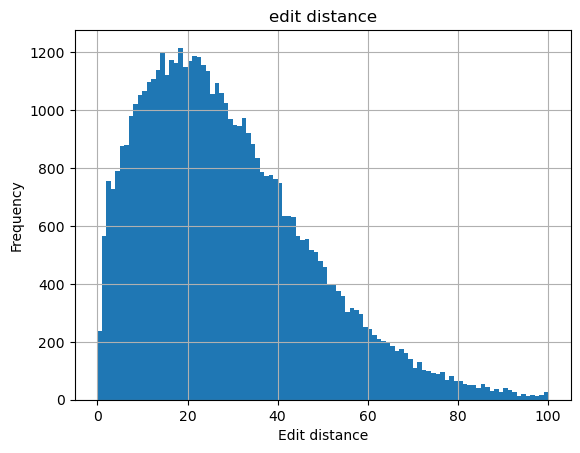

In [29]:
axarr = df.hist(bins=100, range=(0,100))
for ax in axarr.flatten():
    ax.set_xlabel("Edit distance")
    ax.set_ylabel("Frequency")